# Correlation Analysis: Model Error vs. Feature Effect Error

<script>
    document.querySelector('head').innerHTML += '<style>.slides { zoom: 0.975 !important; }</style>';
</script>
<style>
/* Ensure the entire cell and its output take full width */
.reveal .slides > section .cell {
    width: 90% !important;
    margin: 0 auto;
}

.reveal .slides > section .output {
    width: 90% !important;
    max-width: 90% !important;
    height: 90% !important;
    max-height: 90% !important;
    margin: 0 auto;
}

/* Optional: Adjust the slide width if necessary */
.reveal .slides {
    width: 90% !important;
    max-width: 90% !important;
    height: 90% !important;
    max-height: 90% !important;
}


</style>

## Model Results

In [1]:
config_file = "../config_sim_friedman1_centered.ini"

In [2]:
from configparser import ConfigParser
import pandas as pd

from feature_effect_empirical_analysis.plotting.utils import create_joined_melted_df
from feature_effect_empirical_analysis.plotting.plots import plot_correlation_analysis

In [3]:
config = ConfigParser()
config.read(config_file)

['../config_sim_friedman1_centered.ini']

In [4]:
model_results_storage = config.get("storage", "model_results")
df_model_res = pd.read_sql_table("model_results", f"sqlite:///..{model_results_storage}")
df_model_res.head()

,index,model_id,model,simulation,n_train,snr,mse_train,mse_test,mae_train,mae_test,r2_train,r2_test
0,0,RandomForestRegressor_20240612_1_1000_10.0,RandomForestRegressor,1,1000,10.0,1.036574,2.578439,0.814968,1.269319,0.957459,0.893281
1,0,XGBRegressor_20240612_1_1000_10.0,XGBRegressor,1,1000,10.0,0.079628,0.593101,0.221794,0.598516,0.996732,0.975452
2,0,SVR_20240612_1_1000_10.0,SVR,1,1000,10.0,0.213735,0.288419,0.352038,0.427680,0.991228,0.988063
3,0,ElasticNet_20240612_1_1000_10.0,ElasticNet,1,1000,10.0,6.092984,5.975528,1.929064,1.894419,0.749944,0.752678
4,0,GAM_20240612_1_1000_10.0,GAM,1,1000,10.0,0.229916,0.244908,0.388136,0.395477,0.990564,0.989863


## Feature Effect Results

In [5]:
feauture_effect_type = "pdp_results"

In [6]:
effects_results_storage = config.get("storage", "effects_results")
df_effect_res = pd.read_sql_table(feauture_effect_type, f"sqlite:///..{effects_results_storage}")
df_effect_res.head()

,index,model_id,model,simulation,n_train,snr,metric,x_1,x_2,x_3,x_4,x_5
0,0,RandomForestRegressor_20240612_1_1000_10.0,RandomForestRegressor,1,1000,10.0,mean_squared_error,0.128911,0.087549,0.702939,0.166610,0.104598
1,0,XGBRegressor_20240612_1_1000_10.0,XGBRegressor,1,1000,10.0,mean_squared_error,0.021785,0.018089,0.036406,0.024300,0.011865
2,0,SVR_20240612_1_1000_10.0,SVR,1,1000,10.0,mean_squared_error,0.000441,0.002251,0.001285,0.000350,0.001112
3,0,ElasticNet_20240612_1_1000_10.0,ElasticNet,1,1000,10.0,mean_squared_error,1.050580,0.965560,2.315831,0.000345,0.006715
4,0,GAM_20240612_1_1000_10.0,GAM,1,1000,10.0,mean_squared_error,0.000484,0.000978,0.003826,0.000013,0.000338


## Correlation Analysis

In [7]:
df_melted = create_joined_melted_df(df_model_res, df_effect_res)
df_melted.head()

,model_id,model_x,simulation_x,n_train_x,snr_x,mse_train,mse_test,mae_train,mae_test,r2_train,r2_test,feature,effect_error
0,RandomForestRegressor_20240612_1_1000_10.0,RandomForestRegressor,1,1000,10.0,1.036574,2.578439,0.814968,1.269319,0.957459,0.893281,x_1,0.128911
1,XGBRegressor_20240612_1_1000_10.0,XGBRegressor,1,1000,10.0,0.079628,0.593101,0.221794,0.598516,0.996732,0.975452,x_1,0.021785
2,SVR_20240612_1_1000_10.0,SVR,1,1000,10.0,0.213735,0.288419,0.352038,0.427680,0.991228,0.988063,x_1,0.000441
3,ElasticNet_20240612_1_1000_10.0,ElasticNet,1,1000,10.0,6.092984,5.975528,1.929064,1.894419,0.749944,0.752678,x_1,1.050580
4,GAM_20240612_1_1000_10.0,GAM,1,1000,10.0,0.229916,0.244908,0.388136,0.395477,0.990564,0.989863,x_1,0.000484


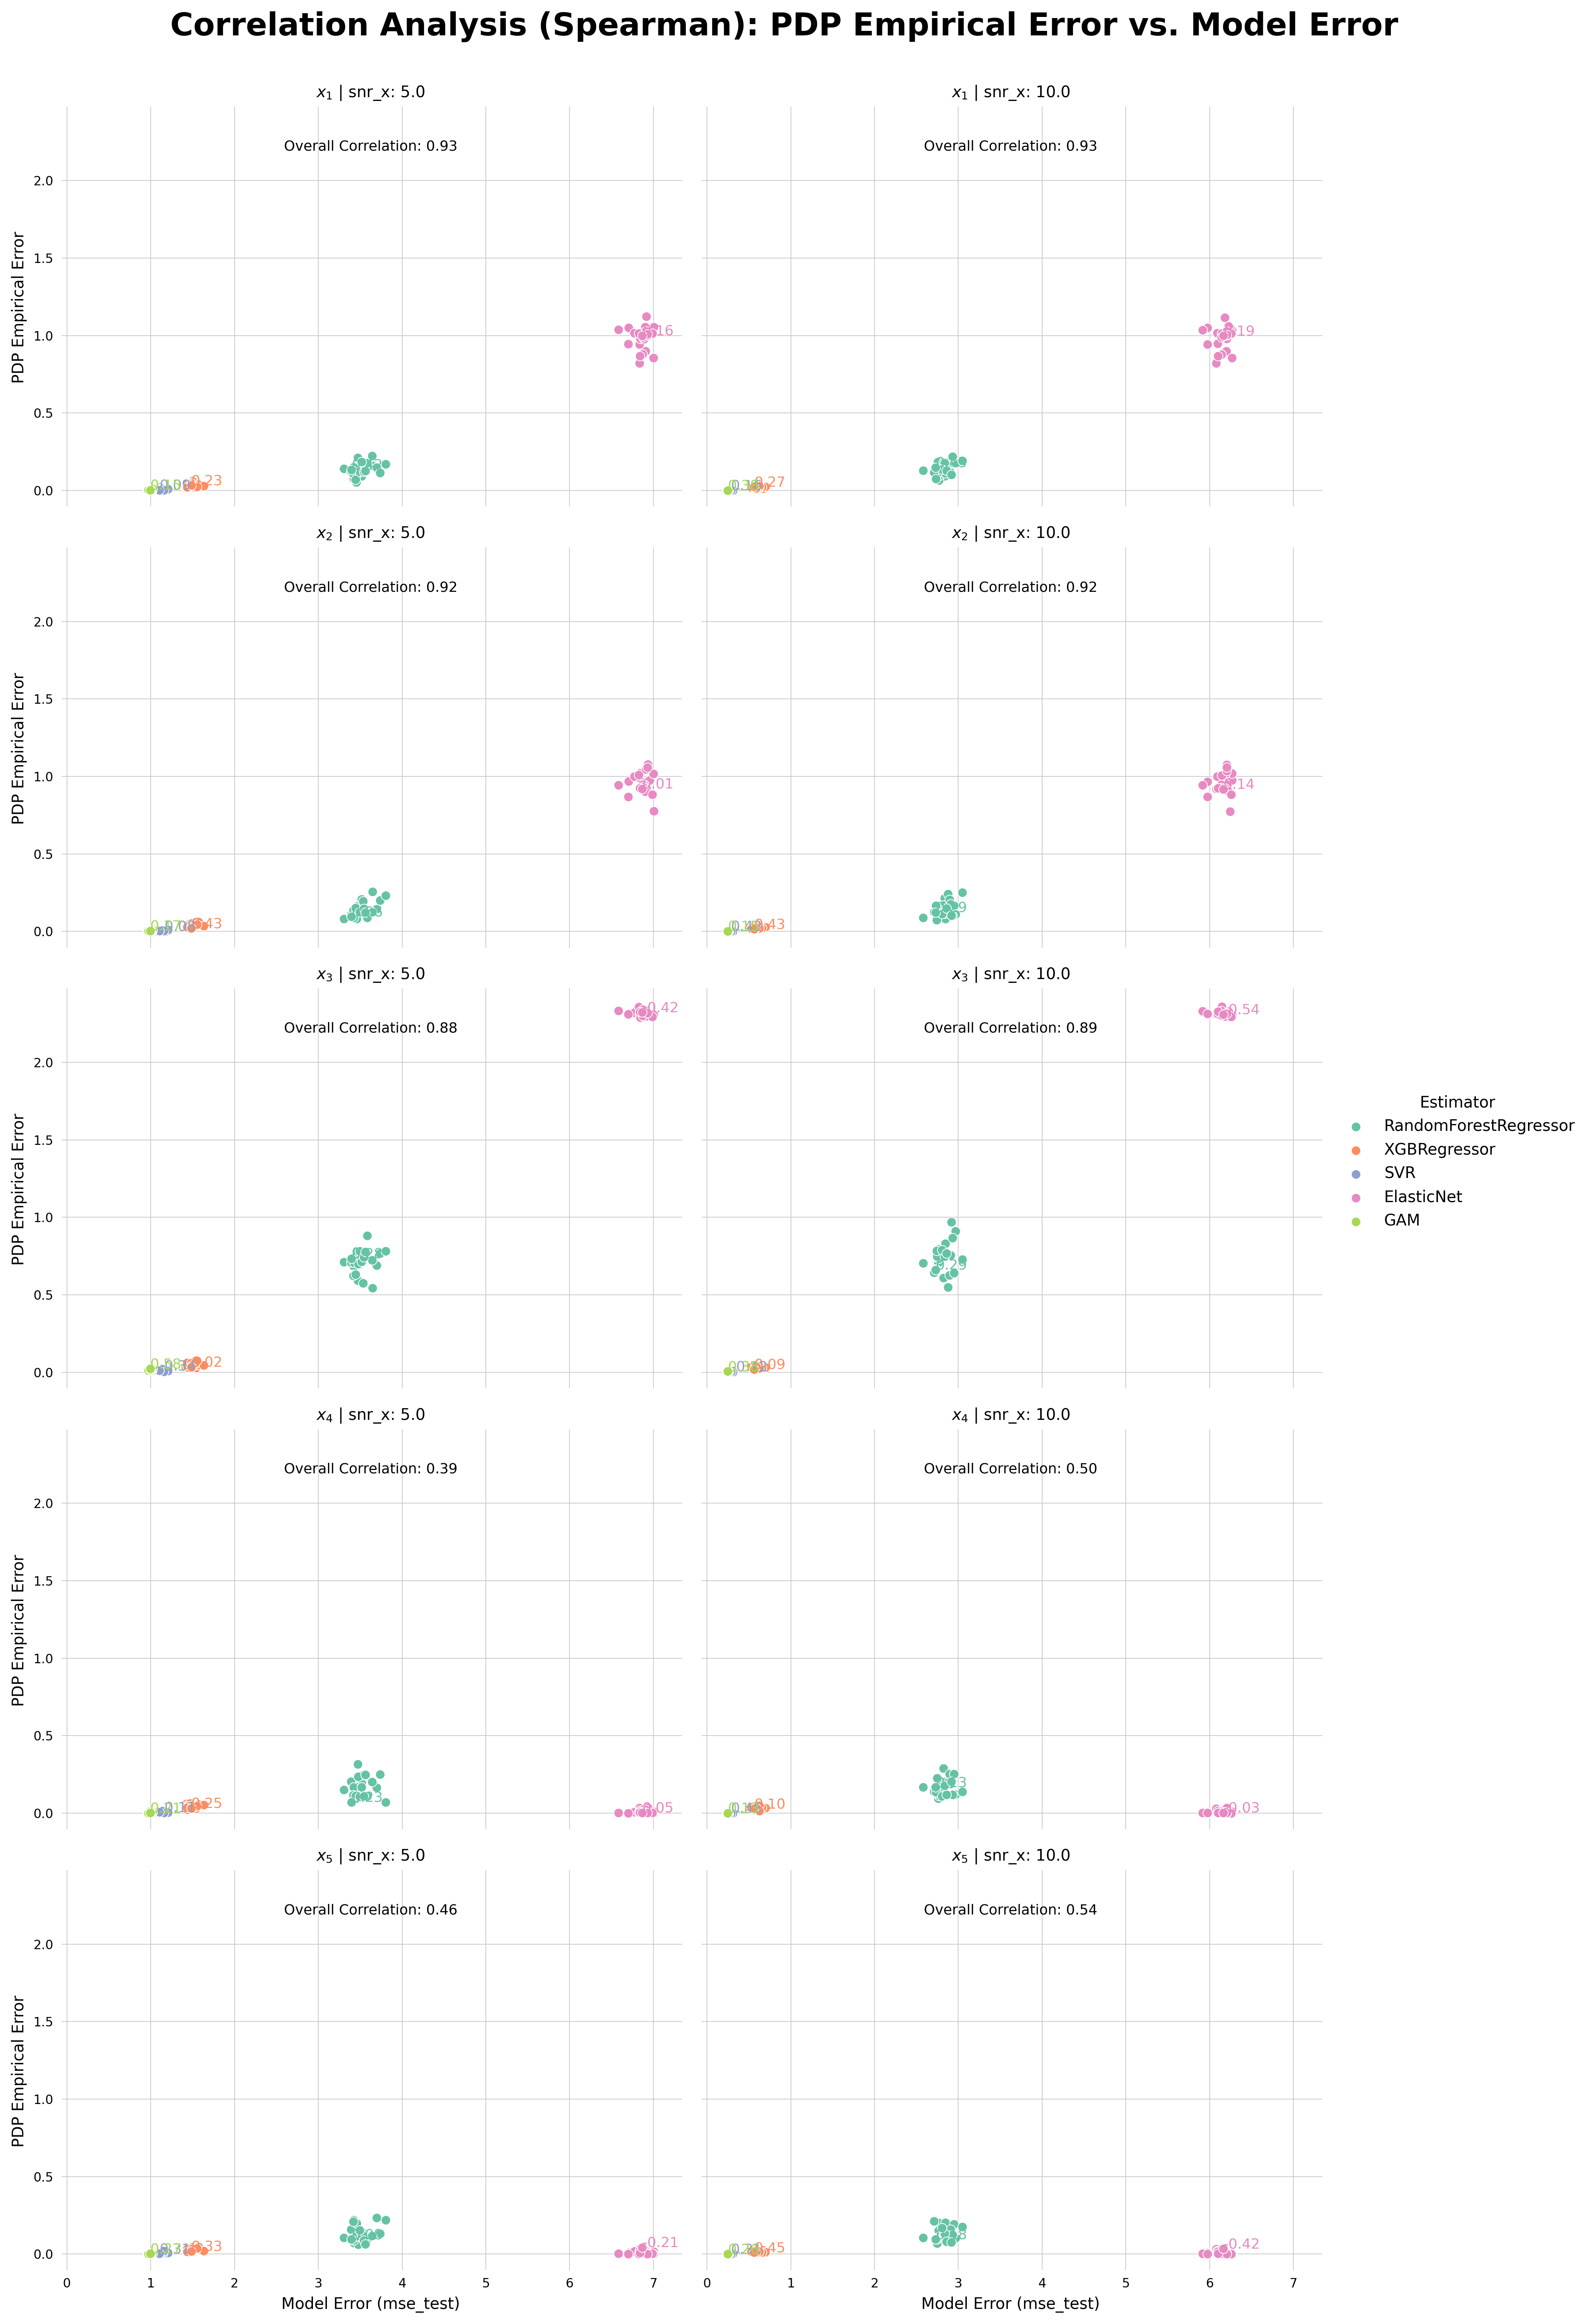

In [11]:
models = df_melted["model_x"].unique().tolist()

g, df_corr = plot_correlation_analysis(
    df_melted,
    models,
    model_error_metric="mse_test",
    feature_effect="PDP Empirical",
    correlation_metric="Spearman",
    overall_correlation=True,
    return_correlation_table=True,
)

In [9]:
g;

In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_corr.set_index(["feature", "snr", "model"]))

correlation
feature snr  model                             
x_1     5.0  Overall                   0.930390
             RandomForestRegressor     0.420769
             XGBRegressor              0.225385
             SVR                       0.088462
             ElasticNet                0.155385
             GAM                       0.154615
        10.0 Overall                   0.933155
             RandomForestRegressor     0.425385
             XGBRegressor              0.273077
             SVR                       0.159231
             ElasticNet                0.186923
             GAM                       0.376923
x_2     5.0  Overall                   0.924381
             RandomForestRegressor     0.557692
             XGBRegressor              0.427692
             SVR                      -0.081538
             ElasticNet                0.013077
             GAM                       0.173846
        10.0 Overall                   0.922495
             RandomForestRegressor     0.290769
             XGBRegressor              0.433846
             SVR                       0.420769
             ElasticNet                0.135385
             GAM                       0.152308
x_3     5.0  Overall                   0.877217
             RandomForestRegressor     0.277692
             XGBRegressor              0.024615
             SVR                      -0.340769
             ElasticNet               -0.421538
             GAM                       0.581538
        10.0 Overall                   0.887152
             RandomForestRegressor     0.286923
             XGBRegressor              0.090000
             SVR                      -0.115385
             ElasticNet               -0.536923
             GAM                       0.383846
x_4     5.0  Overall                   0.394482
             RandomForestRegressor     0.229231
             XGBRegressor              0.252308
             SVR                      -0.112308
             ElasticNet                0.045385
             GAM                       0.210769
        10.0 Overall                   0.501512
             RandomForestRegressor     0.128462
             XGBRegressor              0.101538
             SVR                       0.448462
             ElasticNet               -0.028462
             GAM                       0.128462
x_5     5.0  Overall                   0.455920
             RandomForestRegressor     0.080769
             XGBRegressor              0.330000
             SVR                       0.313077
             ElasticNet               -0.208462
             GAM                       0.269231
        10.0 Overall                   0.543318
             RandomForestRegressor     0.176923
             XGBRegressor              0.446923
             SVR                       0.306923
             ElasticNet               -0.418462
             GAM                       0.260769

## Feature Effect Results

In [12]:
feauture_effect_type = "ale_results"

In [13]:
effects_results_storage = config.get("storage", "effects_results")
df_effect_res = pd.read_sql_table(feauture_effect_type, f"sqlite:///..{effects_results_storage}")
df_effect_res.head()

,index,model_id,model,simulation,n_train,snr,metric,x_1,x_2,x_3,x_4,x_5
0,0,RandomForestRegressor_20240612_1_1000_10.0,RandomForestRegressor,1,1000,10.0,mean_squared_error,0.058169,0.187484,0.524645,0.106930,0.019328
1,0,XGBRegressor_20240612_1_1000_10.0,XGBRegressor,1,1000,10.0,mean_squared_error,0.038246,0.110544,0.034656,0.054126,0.164432
2,0,SVR_20240612_1_1000_10.0,SVR,1,1000,10.0,mean_squared_error,0.000752,0.002190,0.001141,0.000246,0.000768
3,0,ElasticNet_20240612_1_1000_10.0,ElasticNet,1,1000,10.0,mean_squared_error,1.077304,1.006934,2.293690,0.000351,0.006477
4,0,GAM_20240612_1_1000_10.0,GAM,1,1000,10.0,mean_squared_error,0.000408,0.000808,0.003597,0.000013,0.000325


## Correlation Analysis

In [14]:
df_melted = create_joined_melted_df(df_model_res, df_effect_res)
df_melted.head()

,model_id,model_x,simulation_x,n_train_x,snr_x,mse_train,mse_test,mae_train,mae_test,r2_train,r2_test,feature,effect_error
0,RandomForestRegressor_20240612_1_1000_10.0,RandomForestRegressor,1,1000,10.0,1.036574,2.578439,0.814968,1.269319,0.957459,0.893281,x_1,0.058169
1,XGBRegressor_20240612_1_1000_10.0,XGBRegressor,1,1000,10.0,0.079628,0.593101,0.221794,0.598516,0.996732,0.975452,x_1,0.038246
2,SVR_20240612_1_1000_10.0,SVR,1,1000,10.0,0.213735,0.288419,0.352038,0.427680,0.991228,0.988063,x_1,0.000752
3,ElasticNet_20240612_1_1000_10.0,ElasticNet,1,1000,10.0,6.092984,5.975528,1.929064,1.894419,0.749944,0.752678,x_1,1.077304
4,GAM_20240612_1_1000_10.0,GAM,1,1000,10.0,0.229916,0.244908,0.388136,0.395477,0.990564,0.989863,x_1,0.000408


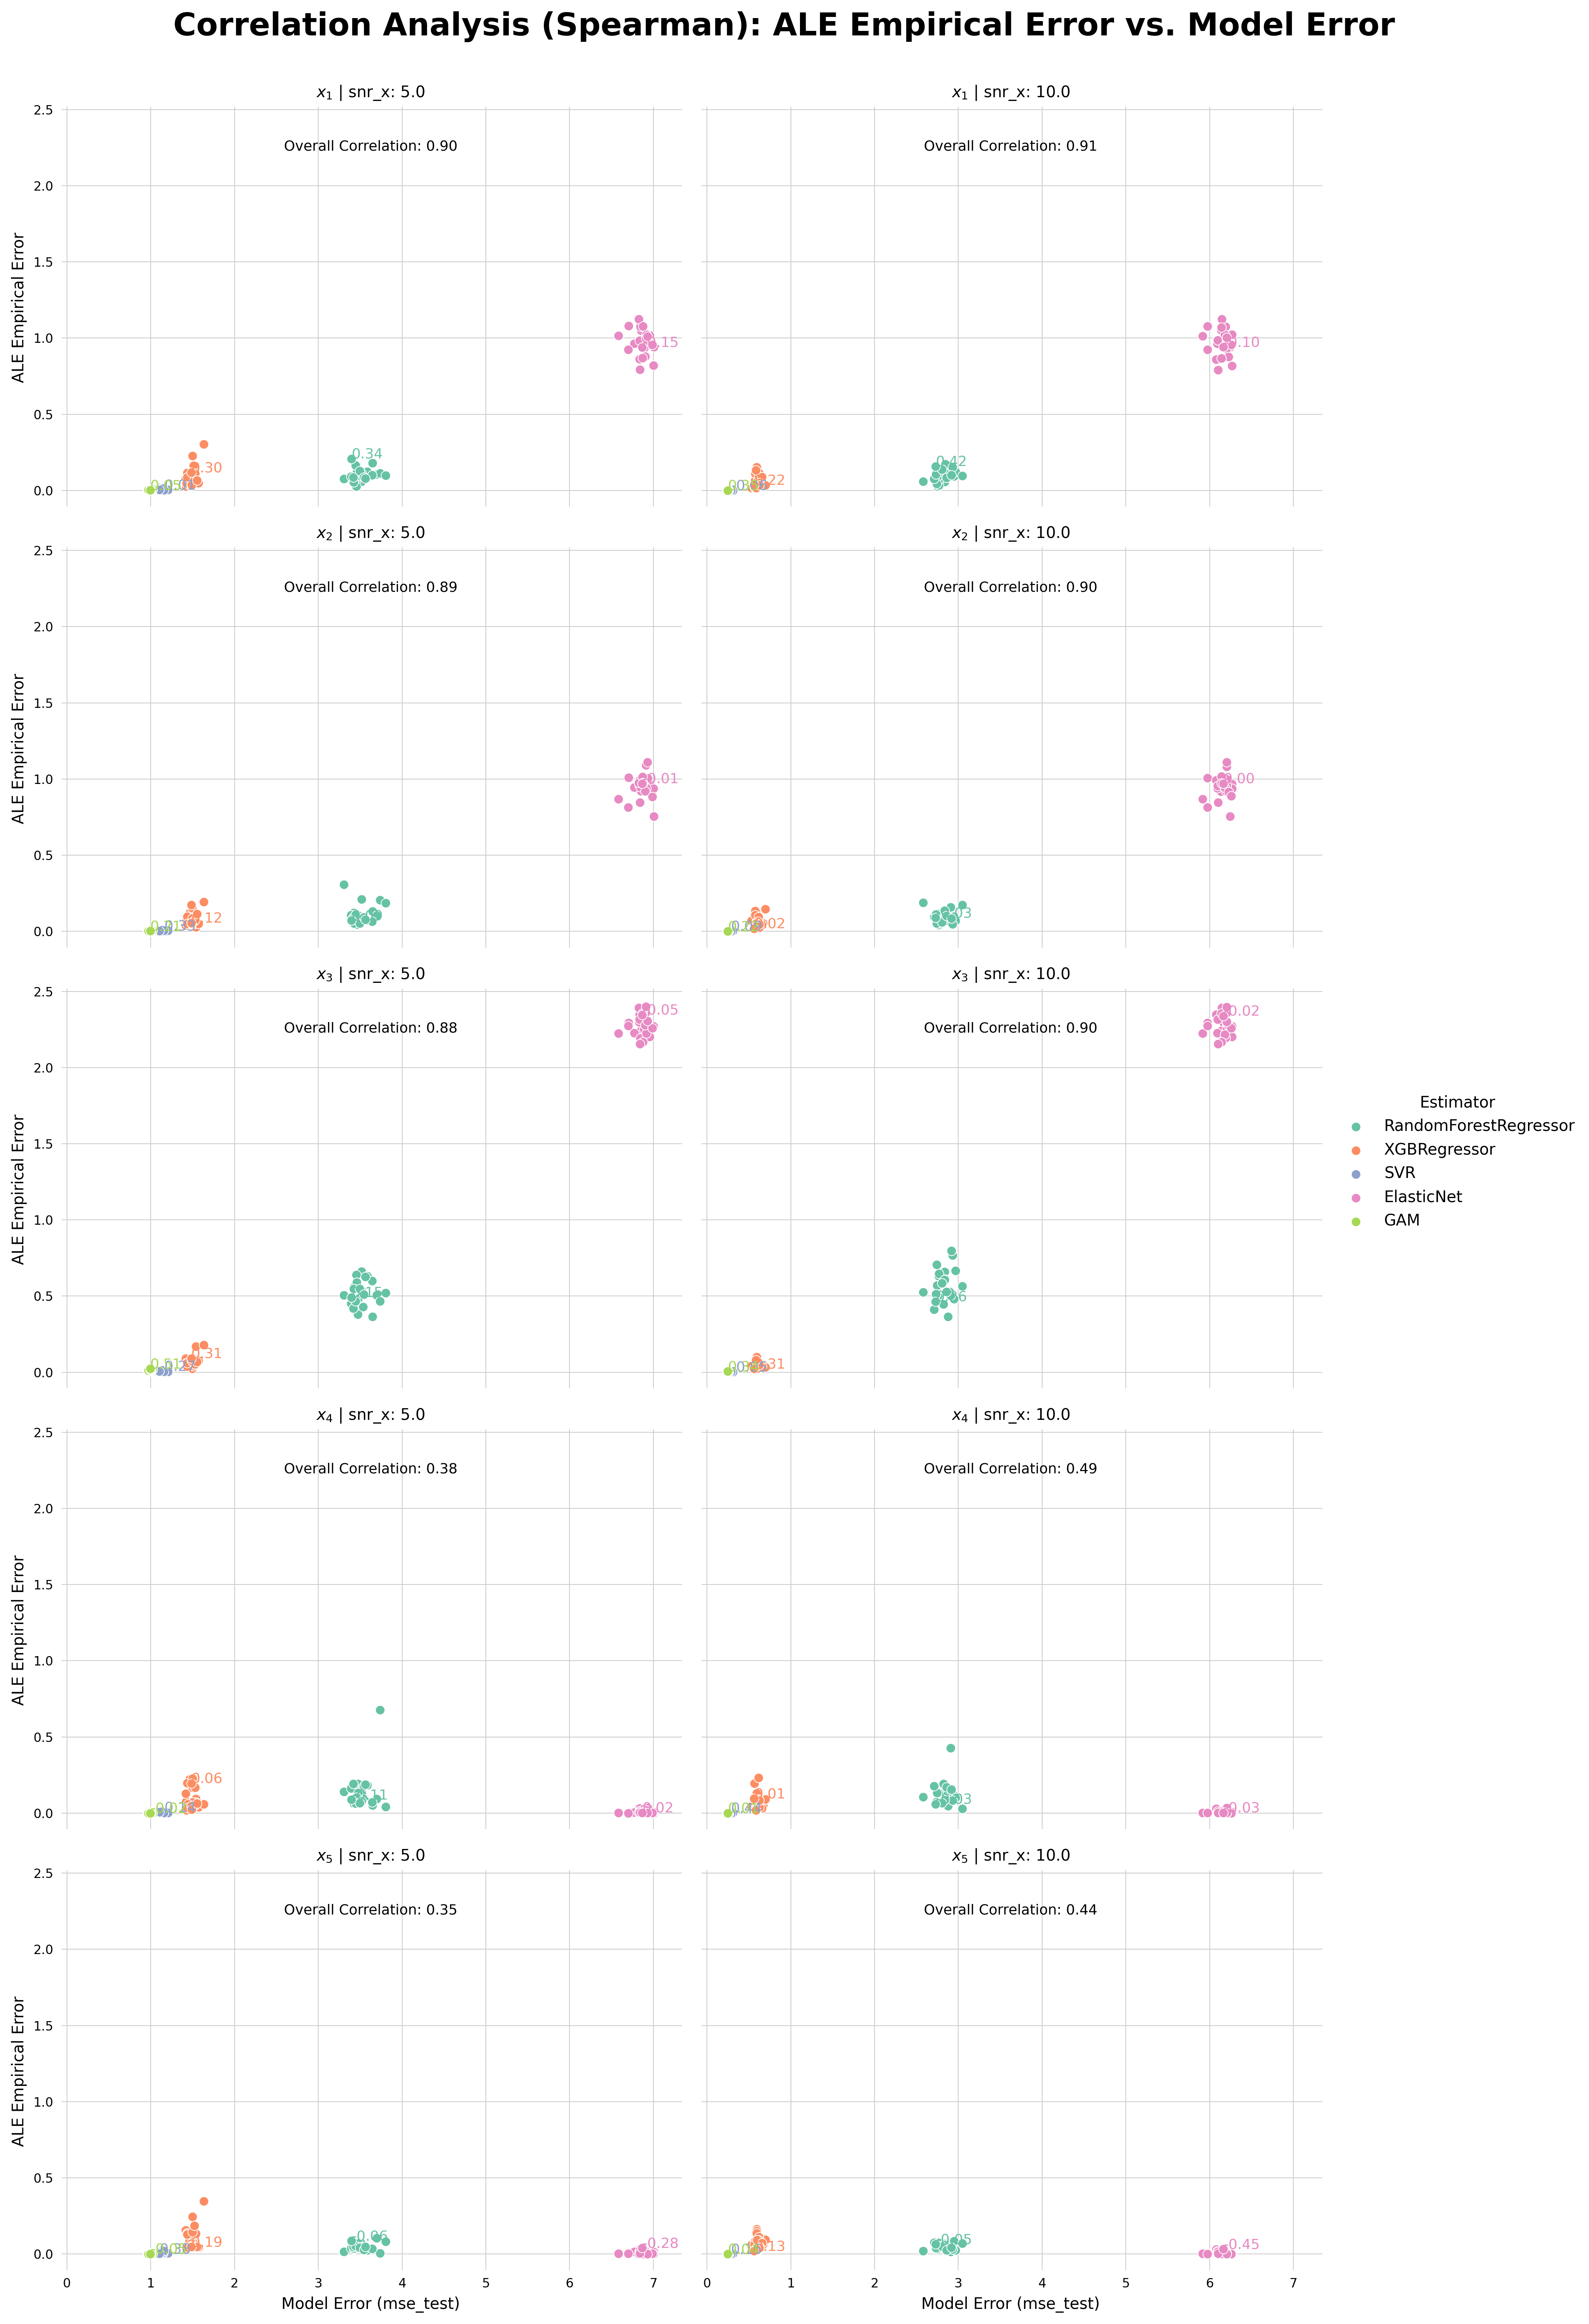

In [15]:
models = df_melted["model_x"].unique().tolist()

g, df_corr = plot_correlation_analysis(
    df_melted,
    models,
    model_error_metric="mse_test",
    feature_effect="ALE Empirical",
    correlation_metric="Spearman",
    overall_correlation=True,
    return_correlation_table=True,
)

In [16]:
g;

In [17]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_corr.set_index(["feature", "snr", "model"]))

correlation
feature snr  model                             
x_1     5.0  Overall                   0.895201
             RandomForestRegressor     0.339231
             XGBRegressor              0.297692
             SVR                      -0.013077
             ElasticNet               -0.153846
             GAM                       0.048462
        10.0 Overall                   0.905493
             RandomForestRegressor     0.423846
             XGBRegressor              0.216154
             SVR                      -0.056154
             ElasticNet               -0.097692
             GAM                       0.348462
x_2     5.0  Overall                   0.887736
             RandomForestRegressor     0.090769
             XGBRegressor              0.116923
             SVR                      -0.330000
             ElasticNet               -0.013077
             GAM                       0.207692
        10.0 Overall                   0.897585
             RandomForestRegressor    -0.026923
             XGBRegressor              0.015385
             SVR                       0.088462
             ElasticNet                0.002308
             GAM                       0.218462
x_3     5.0  Overall                   0.879515
             RandomForestRegressor     0.150769
             XGBRegressor              0.310769
             SVR                      -0.274615
             ElasticNet               -0.049231
             GAM                       0.510769
        10.0 Overall                   0.895644
             RandomForestRegressor     0.258462
             XGBRegressor              0.308462
             SVR                      -0.050000
             ElasticNet               -0.023846
             GAM                       0.342308
x_4     5.0  Overall                   0.380664
             RandomForestRegressor    -0.110000
             XGBRegressor              0.055385
             SVR                      -0.136923
             ElasticNet                0.021538
             GAM                      -0.022308
        10.0 Overall                   0.488762
             RandomForestRegressor    -0.032308
             XGBRegressor              0.011538
             SVR                       0.443846
             ElasticNet               -0.029231
             GAM                       0.014615
x_5     5.0  Overall                   0.353942
             RandomForestRegressor    -0.058462
             XGBRegressor              0.186154
             SVR                       0.376923
             ElasticNet               -0.283077
             GAM                      -0.048462
        10.0 Overall                   0.441886
             RandomForestRegressor    -0.054615
             XGBRegressor              0.131538
             SVR                       0.147692
             ElasticNet               -0.448462
             GAM                       0.036923